In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [107]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [109]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [110]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

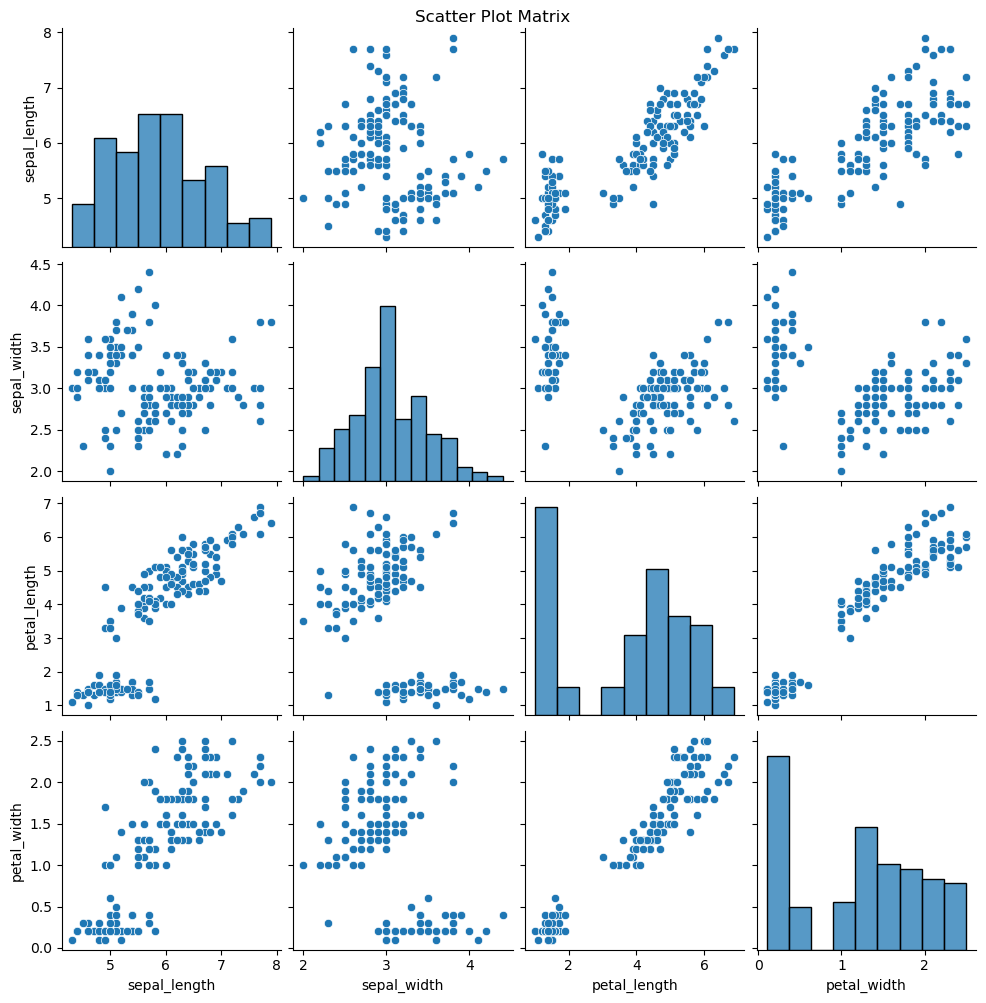

In [111]:
sns.pairplot(df.drop(columns=['species']))

plt.suptitle("Scatter Plot Matrix", y=1)
plt.show()

In [112]:
x = df.drop('species', axis = 1)
y = df['species']

In [113]:
from sklearn.preprocessing import MinMaxScaler

scaler =MinMaxScaler()

In [114]:
x_scaled = scaler.fit_transform(x)

In [115]:
#cross validiation => 75, 25
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.25,  
    random_state=0
)


In [116]:
x_train.shape , y_train.shape

((112, 4), (112,))

In [117]:
x_test.shape, y_test.shape

((38, 4), (38,))

In [118]:
#build the model

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
knn = KNeighborsClassifier(n_neighbors = 7)

In [121]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [122]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9736842105263158


In [123]:
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


Error Rate: 0.02631578947368418


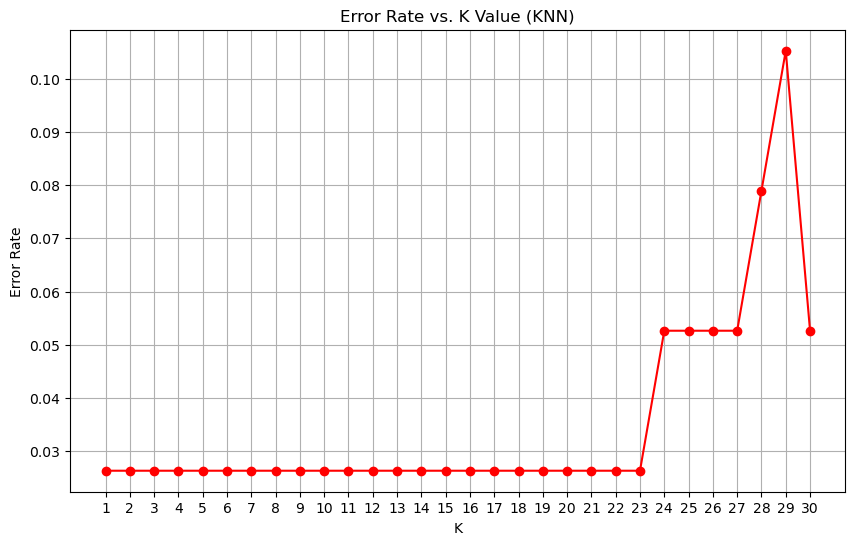

     K  Error Rate
0    1    0.026316
1    2    0.026316
2    3    0.026316
3    4    0.026316
4    5    0.026316
5    6    0.026316
6    7    0.026316
7    8    0.026316
8    9    0.026316
9   10    0.026316
10  11    0.026316
11  12    0.026316
12  13    0.026316
13  14    0.026316
14  15    0.026316
15  16    0.026316
16  17    0.026316
17  18    0.026316
18  19    0.026316
19  20    0.026316
20  21    0.026316
21  22    0.026316
22  23    0.026316
23  24    0.052632
24  25    0.052632
25  26    0.052632
26  27    0.052632
27  28    0.078947
28  29    0.105263
29  30    0.052632


In [124]:
#appropriate  k value using for loop from 1 to 30 and save result of each loop in list like make a empty list for it and use append to store 
import matplotlib.pyplot as plt
error_rates = []

# Loop through K values
k_values = range(1, 31)  # K = 1 to 20

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    error = 1 - acc
    error_rates.append(error)

# Plot error rate vs K
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='-', color='red')
plt.title('Error Rate vs. K Value (KNN)')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Save error rates
error_df = pd.DataFrame({'K': list(k_values), 'Error Rate': error_rates})
print(error_df)

In [126]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [ ]:
knn = KNeighborsClassifier(n_neighbor =)